In [1]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 
import pickle
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


### Hyperparameter search

In [12]:
fn_in = 'cifar10_conv_np_hyperparam_search_varalpha_septsearch_dfa_1.npz'

with open(fn_in, 'rb') as f:
    data = pickle.load(f)
    
params = data['params']
testaccs = data['test_accs']
N = 200
#Have to reshape..... idiot
testaccs = np.array(testaccs).reshape((-1,N))

array([0.42117388, 0.6958133 , 0.47736378, 0.43169071, 0.75140224,
       0.23577724, 0.70432692, 0.59124599, 0.7265625 , 0.32822516,
       0.69090545, 0.52173478, 0.73187099, 0.69901843, 0.43760016,
       0.34595353, 0.69781651, 0.51131811, 0.72395833, 0.55278446,
       0.62870593, 0.68870192, 0.74639423, 0.64623397, 0.26492388,
       0.69451122, 0.44891827, 0.51692708, 0.55498798, 0.73177083,
       0.50340545, 0.62790465, 0.61848958, 0.66075721, 0.51161859,
       0.39563301, 0.47736378, 0.62479968, 0.43309295, 0.64583333,
       0.70432692, 0.39543269, 0.1733774 , 0.56770833])

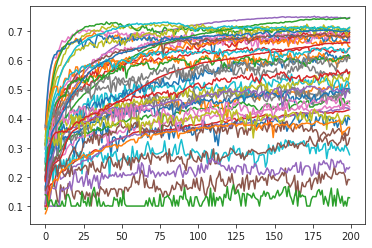

In [16]:
plt.plot(testaccs.T)
max_accs = np.max(testaccs,1)
#Index of the max...
idx_max = np.argmax(max_accs)
np.max(testaccs,1)

In [14]:
params[idx_max]

[0.06731800974441343, 4.784753032445571e-06, 8.321544910111455e-06]

In [15]:
#Optimal performane
np.max(max_accs)

0.7514022435897436

### Those same parameters but without the node pert...

In [50]:
fn_in = 'cifar10_conv_np_septsearch_dfaonly.npz'
a = np.load(fn_in, allow_pickle = True)
b = {'train_acc': [0.10510817307692308, 0.1890224358974359, 0.2377403846153846, 0.26390224358974357, 0.30464743589743587, 0.3406650641025641, 0.36446314102564104, 0.38325320512820515, 0.3948317307692308, 0.4083934294871795, 0.4238581730769231, 0.43579727564102566, 0.44583333333333336, 0.45606971153846154, 0.46484375, 0.47596153846153844, 0.4846153846153846, 0.4929286858974359, 0.5011618589743589, 0.5074519230769231, 0.5178886217948718, 0.5247395833333334, 0.5336939102564102, 0.5389823717948717, 0.5479967948717949, 0.5557892628205128, 0.5626201923076923, 0.5694110576923077, 0.5753004807692308, 0.5813501602564103, 0.5889823717948718, 0.5923677884615385, 0.5994791666666667, 0.6024439102564103, 0.6072516025641026, 0.6137219551282052, 0.6161458333333333, 0.6221554487179487, 0.6269831730769231, 0.6296474358974359, 0.6346153846153846, 0.6375600961538461, 0.6419070512820513, 0.6432892628205128, 0.6490384615384616, 0.6538261217948718, 0.6560296474358974, 0.6583934294871795, 0.662099358974359, 0.6638020833333333, 0.6682091346153847, 0.6709535256410256, 0.673838141025641, 0.6770032051282051, 0.6815104166666667, 0.6819911858974359, 0.684775641025641, 0.6864182692307692, 0.690224358974359, 0.6930288461538462, 0.6945713141025641, 0.6971153846153846, 0.6999399038461539, 0.7024439102564103, 0.7052483974358974, 0.7064302884615384, 0.709375, 0.7097355769230769, 0.7123397435897436, 0.7159254807692308, 0.7186698717948717, 0.7198116987179487, 0.7215344551282051, 0.7233774038461539, 0.7235777243589744, 0.72734375, 0.7304086538461538, 0.733573717948718, 0.73515625, 0.735897435897436, 0.7387419871794871, 0.7422876602564102, 0.7420272435897436, 0.7428886217948718, 0.7465344551282052, 0.7485977564102564, 0.7503004807692307, 0.7514623397435898, 0.7534254807692308, 0.7555488782051282, 0.7565304487179487, 0.7584535256410256, 0.7611177884615384, 0.7628205128205128, 0.7638621794871795, 0.7671073717948718, 0.7681290064102564, 0.7698116987179487, 0.7691907051282051, 0.7739783653846154, 0.7754607371794872, 0.7774038461538462, 0.7780448717948718, 0.7803285256410256, 0.7813902243589743, 0.7832732371794872, 0.7860376602564103, 0.7862780448717949, 0.7891826923076923, 0.7912860576923076, 0.7922876602564103, 0.7939102564102564, 0.7965344551282051, 0.7970352564102564, 0.7983573717948718, 0.8022035256410256, 0.8029046474358974, 0.8052083333333333, 0.8072916666666666, 0.8087339743589743, 0.8092147435897435, 0.8113381410256411, 0.8130809294871795, 0.8158854166666667, 0.8170673076923077, 0.8186097756410257, 0.8206129807692307, 0.8219751602564103, 0.8242588141025641, 0.8274038461538461, 0.8267628205128205, 0.8309094551282051, 0.8319711538461538, 0.8325120192307692, 0.8358974358974359, 0.83671875, 0.8388020833333333, 0.8415264423076924, 0.84375, 0.8449719551282051, 0.8454126602564103, 0.8486578525641025, 0.8496995192307693, 0.8510616987179487, 0.8542668269230769, 0.8550280448717948, 0.8575320512820512, 0.8598958333333333, 0.861338141025641, 0.8638421474358975, 0.8658854166666666, 0.8672275641025641, 0.8704126602564103, 0.8707331730769231, 0.8715144230769231, 0.8732371794871795, 0.8750600961538462, 0.87890625, 0.8797876602564103, 0.8822516025641025, 0.8839743589743589, 0.8856570512820513, 0.8880208333333334, 0.8888822115384616, 0.8913661858974359, 0.8921073717948718, 0.8944711538461538, 0.8947916666666667, 0.8970753205128205, 0.9002403846153846, 0.9010216346153846, 0.9026041666666667, 0.9051482371794872, 0.9068709935897435, 0.9078525641025641, 0.9108974358974359, 0.9112179487179487, 0.914823717948718, 0.9163461538461538, 0.9188501602564103, 0.9176883012820513, 0.9208333333333333, 0.9229166666666667, 0.9224358974358975, 0.9262620192307692, 0.9283653846153846, 0.9290865384615384, 0.9306490384615385, 0.9323717948717949, 0.9342548076923077, 0.9347556089743589, 0.9372395833333333, 0.9389423076923077, 0.9419471153846154, 0.9405448717948718, 0.9424278846153846, 0.9453525641025641, 0.9469350961538462, 0.9472956730769231, 0.9474559294871795], 'test_acc': [0.15314503205128205, 0.2288661858974359, 0.26412259615384615, 0.3058894230769231, 0.3488581730769231, 0.37129407051282054, 0.3835136217948718, 0.39503205128205127, 0.41025641025641024, 0.42568108974358976, 0.43920272435897434, 0.4485176282051282, 0.45853365384615385, 0.46534455128205127, 0.4752604166666667, 0.48257211538461536, 0.4912860576923077, 0.49889823717948717, 0.5072115384615384, 0.5145232371794872, 0.5229366987179487, 0.530448717948718, 0.5387620192307693, 0.5472756410256411, 0.5527844551282052, 0.5612980769230769, 0.5659054487179487, 0.5702123397435898, 0.5751201923076923, 0.5798277243589743, 0.5824318910256411, 0.5882411858974359, 0.5916466346153846, 0.5964543269230769, 0.600761217948718, 0.6059695512820513, 0.6059695512820513, 0.6102764423076923, 0.6148838141025641, 0.6180889423076923, 0.6212940705128205, 0.6223958333333334, 0.6266025641025641, 0.6283052884615384, 0.6309094551282052, 0.6334134615384616, 0.6349158653846154, 0.6388221153846154, 0.6405248397435898, 0.6419270833333334, 0.6438301282051282, 0.6463341346153846, 0.6498397435897436, 0.6510416666666666, 0.653145032051282, 0.655448717948718, 0.6563501602564102, 0.6584535256410257, 0.6590544871794872, 0.6608573717948718, 0.6622596153846154, 0.6636618589743589, 0.6660657051282052, 0.6676682692307693, 0.6703725961538461, 0.6732772435897436, 0.6741786858974359, 0.6746794871794872, 0.6750801282051282, 0.6780849358974359, 0.6776842948717948, 0.6803886217948718, 0.6812900641025641, 0.6829927884615384, 0.6842948717948718, 0.6842948717948718, 0.6857972756410257, 0.6867988782051282, 0.6867988782051282, 0.6895032051282052, 0.6901041666666666, 0.6903044871794872, 0.6915064102564102, 0.6933092948717948, 0.694511217948718, 0.6960136217948718, 0.6964142628205128, 0.6991185897435898, 0.69921875, 0.7011217948717948, 0.7020232371794872, 0.7022235576923077, 0.703926282051282, 0.7038261217948718, 0.7051282051282052, 0.7053285256410257, 0.7056290064102564, 0.7068309294871795, 0.7083333333333334, 0.7079326923076923, 0.7100360576923077, 0.7106370192307693, 0.7115384615384616, 0.711738782051282, 0.7128405448717948, 0.7130408653846154, 0.7144431089743589, 0.714042467948718, 0.7151442307692307, 0.7159455128205128, 0.7155448717948718, 0.7155448717948718, 0.7144431089743589, 0.7171474358974359, 0.7174479166666666, 0.7159455128205128, 0.7170472756410257, 0.71875, 0.7181490384615384, 0.7200520833333334, 0.7189503205128205, 0.7186498397435898, 0.719551282051282, 0.7199519230769231, 0.719551282051282, 0.7191506410256411, 0.7215544871794872, 0.7220552884615384, 0.7207532051282052, 0.7203525641025641, 0.7207532051282052, 0.7198517628205128, 0.7204527243589743, 0.7200520833333334, 0.721854967948718, 0.7228565705128205, 0.7223557692307693, 0.7208533653846154, 0.7217548076923077, 0.7233573717948718, 0.721854967948718, 0.7231570512820513, 0.7221554487179487, 0.7238581730769231, 0.7225560897435898, 0.7230568910256411, 0.7227564102564102, 0.7259615384615384, 0.723457532051282, 0.7255608974358975, 0.7239583333333334, 0.7239583333333334, 0.7242588141025641, 0.7222556089743589, 0.7230568910256411, 0.7241586538461539, 0.72265625, 0.7238581730769231, 0.7242588141025641, 0.7222556089743589, 0.7232572115384616, 0.7244591346153846, 0.7246594551282052, 0.7233573717948718, 0.7224559294871795, 0.7253605769230769, 0.7238581730769231, 0.7230568910256411, 0.7239583333333334, 0.7225560897435898, 0.7240584935897436, 0.7247596153846154, 0.7230568910256411, 0.7238581730769231, 0.7222556089743589, 0.7251602564102564, 0.7208533653846154, 0.7241586538461539, 0.7217548076923077, 0.7236578525641025, 0.721854967948718, 0.7227564102564102, 0.7230568910256411, 0.7208533653846154, 0.7213541666666666, 0.7224559294871795, 0.7223557692307693, 0.7232572115384616, 0.7229567307692307, 0.7217548076923077, 0.7194511217948718, 0.7202524038461539, 0.7202524038461539, 0.7192508012820513, 0.7198517628205128, 0.7177483974358975, 0.7206530448717948, 0.7196514423076923, 0.7176482371794872, 0.7164463141025641]}
b['train_acc']
testaccs = b['test_acc']

0.7259615384615384

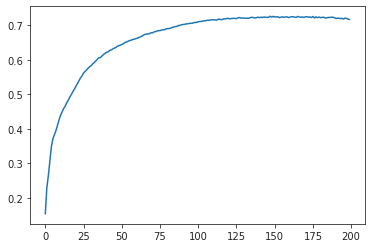

In [51]:
plt.plot(testaccs)
np.max(testaccs)

## DFA only hyperparam search

In [52]:
fn_in = 'cifar10_conv_np_hyperparam_search_varalpha_septsearch_dfa_1_fblearning_0.npz'

with open(fn_in, 'rb') as f:
    data = pickle.load(f)
    
params = data['params']
testaccs = data['test_accs']
N = 200
#Have to reshape..... idiot
testaccs = np.array(testaccs).reshape((-1,N))

array([0.22516026, 0.60166266, 0.70062099, 0.5453726 , 0.45382612,
       0.53846154, 0.71834936, 0.67417869, 0.66105769, 0.41887019,
       0.57261619, 0.66877003, 0.38301282, 0.49629407, 0.73237179,
       0.47686298, 0.6786859 , 0.53054888, 0.47215545, 0.57471955,
       0.47796474, 0.67207532, 0.63752003, 0.71464343, 0.42207532,
       0.56620593, 0.6083734 , 0.52754407, 0.7026242 , 0.43419471,
       0.57111378, 0.41245994, 0.66796875, 0.25420673])

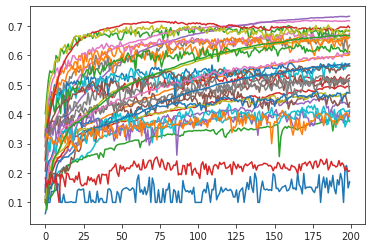

In [53]:
plt.plot(testaccs.T)
max_accs = np.max(testaccs,1)
#Index of the max...
idx_max = np.argmax(max_accs)
np.max(testaccs,1)

In [54]:
params[idx_max]

[0.035185543971951054, 2.5465693538772885e-06, 2.4917157155877284e-06]

In [55]:
#Optimal performane
np.max(max_accs)

0.7323717948717948